<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/4_Naive_bayes_classifier_with_label_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## predicting survival from titanic crash

The Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.

Bayes theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is given by:

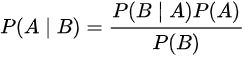
Where P(A|B) is the probabaility of occurrence of A knowing B already occurred and P(B|A) is the probability of occurrence of B knowing A occurred.

Scikit-learn Guide

There are mostly two types of Naive Bayes:

1. Gaussian Naive Bayes

2. Multinomial Naive Bayes.

Multinomial Naive Bayes
The method is used mostly for document classification. For example, classifying an article as sports article or say film magazine. It is also used for differentiating actual mails from spam mails. It uses the frequency of words used in different magazine to make a decision.

For example, the word "Dear" and "friends" are used a lot in actual mails and "offer" and "money" are used a lot in "Spam" mails. It calculates the prorbability of the occurrence of the words in case of actual mails and spam mails using the training examples. So, the probability of occurrence of "money" is much higher in case of spam mails and so on.

Now, we calculate the probability of a mail being a spam mail using the occurrence of words in it.

Gaussian Naive Bayes
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.



data ref:https://www.kaggle.com/competitions/titanic/data?select=test.csv

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df= df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [ ]:
inputs=df.drop('Survived',axis='columns')

In [ ]:
target=df.Survived

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
inputs['sex1'] = label_encoder.fit_transform(inputs['Sex'])

In [ ]:
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex1
0,3,male,22.0,1,0,7.2500,S,1
1,1,female,38.0,1,0,71.2833,C,0
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,0
4,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,1
887,1,female,19.0,0,0,30.0000,S,0
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [ ]:
inputs['Embarked1'] = label_encoder.fit_transform(inputs['Embarked'])

In [ ]:
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex1,Embarked1
0,3,male,22.0,1,0,7.2500,S,1,2
1,1,female,38.0,1,0,71.2833,C,0,0
2,3,female,26.0,0,0,7.9250,S,0,2
3,1,female,35.0,1,0,53.1000,S,0,2
4,3,male,35.0,0,0,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,1,2
887,1,female,19.0,0,0,30.0000,S,0,2
888,3,female,NaN,1,2,23.4500,S,0,2
889,1,male,26.0,0,0,30.0000,C,1,0


In [ ]:
inputs.drop(['Sex','Embarked'],axis='columns',inplace=True)
inputs

KeyError: "['Sex', 'Embarked'] not found in axis"

In [ ]:
inputs.head(3)

,Pclass,Age,SibSp,Parch,Fare,sex1,Embarked1
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.Age[:7]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0


In [ ]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs.Age[:7]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [ ]:
#training the model
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_test,y_test)

0.7985074626865671

In [ ]:
x_test[:10]

,Pclass,Age,SibSp,Parch,Fare,sex1,Embarked1
292,2,36.000000,0,0,12.8750,1,0
525,3,40.500000,0,0,7.7500,1,1
404,3,20.000000,0,0,8.6625,0,2
549,2,8.000000,1,1,36.7500,1,2
49,3,18.000000,1,0,17.8000,0,2
47,3,29.699118,0,0,7.7500,0,1
830,3,15.000000,1,0,14.4542,0,0
254,3,41.000000,0,2,20.2125,0,2
808,2,39.000000,0,0,13.0000,1,2
132,3,47.000000,1,0,14.5000,0,2


In [ ]:
y_test[:10]

,Survived
292,0
525,0
404,0
549,1
49,0
47,1
830,1
254,0
808,0
132,0


In [ ]:
model.predict(x_test[0:10])

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
model.predict_proba(x_test[:10])

array([[0.82854402, 0.17145598],
       [0.96104077, 0.03895923],
       [0.34653251, 0.65346749],
       [0.85101789, 0.14898211],
       [0.3462554 , 0.6537446 ],
       [0.31209401, 0.68790599],
       [0.1251425 , 0.8748575 ],
       [0.28353238, 0.71646762],
       [0.94423485, 0.05576515],
       [0.436617  , 0.563383  ]])

Home work : you are required to go through below dataset and do classification using naive bayes classifier: https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data